In [1]:
import pandas as pd

dataset = pd.read_excel("AJGT.xlsx")
dataset.head()

,ID,Feed,Sentiment
0,1,اربد فيها جامعات اكثر من عمان ... وفيها قد عم...,Positive
1,2,الحلو انكم بتحكوا على اساس انو الاردن ما فيه ...,Negative
2,3,كله رائع بجد ربنا يكرمك,Positive
3,4,لسانك قذر يا قمامه,Negative
4,5,​انا داشره وغير متزوجه ولدي علاقات مشبوه واحشش...,Negative


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1800 non-null   int64 
 1   Feed       1800 non-null   object
 2   Sentiment  1800 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.3+ KB


In [3]:
dataset['Sentiment'].value_counts()

Positive    900
Negative    900
Name: Sentiment, dtype: int64

In [4]:
feeds = dataset["Feed"]
feeds

0        اربد فيها جامعات اكثر من عمان ... وفيها قد عم...
1        الحلو انكم بتحكوا على اساس انو الاردن ما فيه ...
2                                 كله رائع بجد ربنا يكرمك
3                                      لسانك قذر يا قمامه
4       ​انا داشره وغير متزوجه ولدي علاقات مشبوه واحشش...
                              ...                        
1795                                       يلعن شرف خواتك
1796                                       يلعنك نذل وكلب
1797    يمتاز الاردن بتنوع السياحه فيه فتنقسم السياحه ...
1798                            ينور عليك ويكثر من امثالك
1799                                    يهدي الله من يشاء
Name: Feed, Length: 1800, dtype: object

In [25]:
sentiment = dataset['Sentiment']
sentiment

0       Positive
1       Negative
2       Positive
3       Negative
4       Negative
          ...   
1795    Negative
1796    Negative
1797    Positive
1798    Positive
1799    Positive
Name: Sentiment, Length: 1800, dtype: object

# Text pre-processing

In [29]:
import re
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text

feeds = [remove_diacritics(doc) for doc in feeds]
feeds[:10]

[' اربد فيها جامعات اكثر من عمان  وفيها قد عمان ونص لعيبه المنتخب منها  و 80  من مطربين الاردن منها',
 ' الحلو انكم بتحكوا على اساس انو الاردن ما فيه فساد سرقات',
 ' كله رائع بجد ربنا يكرمك',
 ' لسانك قذر يا قمامه',
 '\u200bانا داشره وغير متزوجه ولدي علاقات مشبوه واحشش واحيانا اهرب مخدرات و اجيد التسليك احب ان انكب نفسي وعلاقتي بالمنزل متوتره جد',
 'ابشرك فيه تحسن ولله الحمد باذن الله يرجع قريبا',
 'ابو الشباب راعي العود ليش ماوزنه في البيت غباء',
 'ابو معيتق قطع اوتار العود وقال السلام عليكم',
 'اتحزن فان الله يدافع عنك والملائكه تستغفر لك و المؤمنون يشركونك في دعائهم كل صلاه  و النبي صلى الله عليه سلم يشفع و القران يعدك وعدا حسنا  و فوق هذا رحمه ارحم الراحمين',
 'اترك ما تهوى لاجل من تخشى']

In [30]:
import string
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

feeds = [remove_punctuations(doc) for doc in feeds]
feeds[:10]

[' اربد فيها جامعات اكثر من عمان  وفيها قد عمان ونص لعيبه المنتخب منها  و 80  من مطربين الاردن منها',
 ' الحلو انكم بتحكوا على اساس انو الاردن ما فيه فساد سرقات',
 ' كله رائع بجد ربنا يكرمك',
 ' لسانك قذر يا قمامه',
 '\u200bانا داشره وغير متزوجه ولدي علاقات مشبوه واحشش واحيانا اهرب مخدرات و اجيد التسليك احب ان انكب نفسي وعلاقتي بالمنزل متوتره جد',
 'ابشرك فيه تحسن ولله الحمد باذن الله يرجع قريبا',
 'ابو الشباب راعي العود ليش ماوزنه في البيت غباء',
 'ابو معيتق قطع اوتار العود وقال السلام عليكم',
 'اتحزن فان الله يدافع عنك والملائكه تستغفر لك و المؤمنون يشركونك في دعائهم كل صلاه  و النبي صلى الله عليه سلم يشفع و القران يعدك وعدا حسنا  و فوق هذا رحمه ارحم الراحمين',
 'اترك ما تهوى لاجل من تخشى']

In [31]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("گ", "ك", text)
    return text

feeds = [normalize_arabic(doc) for doc in feeds]
feeds[:10]

[' اربد فيها جامعات اكثر من عمان  وفيها قد عمان ونص لعيبه المنتخب منها  و 80  من مطربين الاردن منها',
 ' الحلو انكم بتحكوا علي اساس انو الاردن ما فيه فساد سرقات',
 ' كله راءع بجد ربنا يكرمك',
 ' لسانك قذر يا قمامه',
 '\u200bانا داشره وغير متزوجه ولدي علاقات مشبوه واحشش واحيانا اهرب مخدرات و اجيد التسليك احب ان انكب نفسي وعلاقتي بالمنزل متوتره جد',
 'ابشرك فيه تحسن ولله الحمد باذن الله يرجع قريبا',
 'ابو الشباب راعي العود ليش ماوزنه في البيت غباء',
 'ابو معيتق قطع اوتار العود وقال السلام عليكم',
 'اتحزن فان الله يدافع عنك والملاءكه تستغفر لك و المءمنون يشركونك في دعاءهم كل صلاه  و النبي صلي الله عليه سلم يشفع و القران يعدك وعدا حسنا  و فوق هذا رحمه ارحم الراحمين',
 'اترك ما تهوي لاجل من تخشي']

In [33]:
from num2words import num2words

def num_to_text(text):
    out = ''
    for s in text.split():
        if s.isdigit():
            out = out + num2words(int(s), lang='ar')+' '
        else:
            out = out+ s +' '
            
    return out[:-1]

feeds = [num_to_text(doc) for doc in feeds]
feeds[:10]

['اربد فيها جامعات اكثر من عمان وفيها قد عمان ونص لعيبه المنتخب منها و ثمانون من مطربين الاردن منها',
 'الحلو انكم بتحكوا علي اساس انو الاردن ما فيه فساد سرقات',
 'كله راءع بجد ربنا يكرمك',
 'لسانك قذر يا قمامه',
 '\u200bانا داشره وغير متزوجه ولدي علاقات مشبوه واحشش واحيانا اهرب مخدرات و اجيد التسليك احب ان انكب نفسي وعلاقتي بالمنزل متوتره جد',
 'ابشرك فيه تحسن ولله الحمد باذن الله يرجع قريبا',
 'ابو الشباب راعي العود ليش ماوزنه في البيت غباء',
 'ابو معيتق قطع اوتار العود وقال السلام عليكم',
 'اتحزن فان الله يدافع عنك والملاءكه تستغفر لك و المءمنون يشركونك في دعاءهم كل صلاه و النبي صلي الله عليه سلم يشفع و القران يعدك وعدا حسنا و فوق هذا رحمه ارحم الراحمين',
 'اترك ما تهوي لاجل من تخشي']

# Tokenization

In [171]:
from nltk.tokenize import word_tokenize

word_tokens = [word_tokenize(doc) for doc in feeds]
word_tokens[:10]

[['اربد',
  'فيها',
  'جامعات',
  'اكثر',
  'من',
  'عمان',
  'وفيها',
  'قد',
  'عمان',
  'ونص',
  'لعيبه',
  'المنتخب',
  'منها',
  'و',
  'ثمانون',
  'من',
  'مطربين',
  'الاردن',
  'منها'],
 ['الحلو',
  'انكم',
  'بتحكوا',
  'علي',
  'اساس',
  'انو',
  'الاردن',
  'ما',
  'فيه',
  'فساد',
  'سرقات'],
 ['كله', 'راءع', 'بجد', 'ربنا', 'يكرمك'],
 ['لسانك', 'قذر', 'يا', 'قمامه'],
 ['\u200bانا',
  'داشره',
  'وغير',
  'متزوجه',
  'ولدي',
  'علاقات',
  'مشبوه',
  'واحشش',
  'واحيانا',
  'اهرب',
  'مخدرات',
  'و',
  'اجيد',
  'التسليك',
  'احب',
  'ان',
  'انكب',
  'نفسي',
  'وعلاقتي',
  'بالمنزل',
  'متوتره',
  'جد'],
 ['ابشرك', 'فيه', 'تحسن', 'ولله', 'الحمد', 'باذن', 'الله', 'يرجع', 'قريبا'],
 ['ابو', 'الشباب', 'راعي', 'العود', 'ليش', 'ماوزنه', 'في', 'البيت', 'غباء'],
 ['ابو', 'معيتق', 'قطع', 'اوتار', 'العود', 'وقال', 'السلام', 'عليكم'],
 ['اتحزن',
  'فان',
  'الله',
  'يدافع',
  'عنك',
  'والملاءكه',
  'تستغفر',
  'لك',
  'و',
  'المءمنون',
  'يشركونك',
  'في',
  'دعاءهم',
  'كل',
  'صل

# Stop words removal

In [46]:
from nltk.corpus import stopwords

stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [172]:
stopword = stopwords.words("arabic")

def remove_stop_words(words):
    text = [w for w in words if w not in stopword]
    return text

word_tokens = [remove_stop_words(w) for w in word_tokens]
word_tokens


[['اربد',
  'جامعات',
  'اكثر',
  'عمان',
  'وفيها',
  'عمان',
  'ونص',
  'لعيبه',
  'المنتخب',
  'و',
  'ثمانون',
  'مطربين',
  'الاردن'],
 ['الحلو', 'انكم', 'بتحكوا', 'علي', 'اساس', 'انو', 'الاردن', 'فساد', 'سرقات'],
 ['كله', 'راءع', 'بجد', 'ربنا', 'يكرمك'],
 ['لسانك', 'قذر', 'قمامه'],
 ['\u200bانا',
  'داشره',
  'وغير',
  'متزوجه',
  'ولدي',
  'علاقات',
  'مشبوه',
  'واحشش',
  'واحيانا',
  'اهرب',
  'مخدرات',
  'و',
  'اجيد',
  'التسليك',
  'احب',
  'ان',
  'انكب',
  'نفسي',
  'وعلاقتي',
  'بالمنزل',
  'متوتره',
  'جد'],
 ['ابشرك', 'تحسن', 'ولله', 'الحمد', 'باذن', 'الله', 'يرجع', 'قريبا'],
 ['ابو', 'الشباب', 'راعي', 'العود', 'ليش', 'ماوزنه', 'البيت', 'غباء'],
 ['ابو', 'معيتق', 'قطع', 'اوتار', 'العود', 'وقال', 'السلام', 'عليكم'],
 ['اتحزن',
  'فان',
  'الله',
  'يدافع',
  'عنك',
  'والملاءكه',
  'تستغفر',
  'و',
  'المءمنون',
  'يشركونك',
  'دعاءهم',
  'صلاه',
  'و',
  'النبي',
  'صلي',
  'الله',
  'سلم',
  'يشفع',
  'و',
  'القران',
  'يعدك',
  'وعدا',
  'حسنا',
  'و',
  'فوق',
  'ر

# Stemming

In [62]:
from nltk.stem.isri import ISRIStemmer

st = ISRIStemmer()
def stemming_words(words):
    words = [st.stem(w) for w in words]
    return words

stemming_tokens = [stemming_words(w) for w in word_tokens]
stemming_tokens


[['ربد',
  'فيه',
  'جمع',
  'كثر',
  'من',
  'عمن',
  'وفي',
  'قد',
  'عمن',
  'ونص',
  'لعب',
  'نخب',
  'منها',
  'و',
  'ثمن',
  'من',
  'طرب',
  'ارد',
  'منها'],
 ['حلو', 'نكم', 'بتح', 'علي', 'اسس', 'انو', 'ارد', 'ما', 'فيه', 'فسد', 'سرق'],
 ['كله', 'رءع', 'بجد', 'ربن', 'كرم'],
 ['لسن', 'قذر', 'يا', 'قمم'],
 ['\u200bنا',
  'دشر',
  'وغر',
  'تزج',
  'ولد',
  'علق',
  'شبه',
  'حشش',
  'وحي',
  'هرب',
  'خدر',
  'و',
  'اجد',
  'سلك',
  'احب',
  'ان',
  'نكب',
  'نفس',
  'علق',
  'نزل',
  'توتر',
  'جد'],
 ['بشر', 'فيه', 'تحس', 'ولل', 'حمد', 'بذن', 'الل', 'رجع', 'قرب'],
 ['ابو', 'شبب', 'رعي', 'عود', 'ليش', 'اوز', 'في', 'بيت', 'غبء'],
 ['ابو', 'عيتق', 'قطع', 'وار', 'عود', 'وقل', 'سلم', 'علي'],
 ['تحز',
  'فان',
  'الل',
  'دفع',
  'عنك',
  'لءك',
  'غفر',
  'لك',
  'و',
  'ءمن',
  'شركو',
  'في',
  'دعء',
  'كل',
  'صله',
  'و',
  'نبي',
  'صلي',
  'الل',
  'عليه',
  'سلم',
  'شفع',
  'و',
  'قرن',
  'يعد',
  'وعد',
  'حسن',
  'و',
  'فوق',
  'هذا',
  'رحم',
  'رحم',
  'رحم'],
 ['

# Lemmatization

In [15]:
import qalsadi.lemmatizer

lemmer = qalsadi.lemmatizer.Lemmatizer()

word ='انو'
print(ISRIStemmer().stem(word))
print(ISRIStemmer().suf32(word))
print(lemmer.lemmatize(word))

انو
انو
نوى


In [65]:
def Lemmatization_words(words):
    words = [lemmer.lemmatize(w) for w in words]
    return words

Lemmatization_tokens = [Lemmatization_words(w) for w in word_tokens]
Lemmatization_tokens

[['ربد',
  'في',
  'جامع',
  'كثر',
  'من',
  'عمان',
  'في',
  'قد',
  'عمان',
  'نص',
  'عيب',
  'منتخب',
  'من',
  'و',
  'ثمانون',
  'من',
  'مطرب',
  'الاردن',
  'من'],
 ['حلو',
  'انكم',
  'بتحكوا',
  'علي',
  'اساس',
  'نوى',
  'الاردن',
  'ما',
  'في',
  'فساد',
  'سرقة'],
 ['كل', 'راءع', 'جد', 'رب', 'كرم'],
 ['لسان', 'قذر', 'يا', 'قمام'],
 ['\u200b',
  'داشره',
  'غير',
  'متزوج',
  'ولد',
  'علاقة',
  'مشبوه',
  'حش',
  'واحيانا',
  'هرب',
  'مخدر',
  'و',
  'جيد',
  'تسليك',
  'حبى',
  'ان',
  'نكب',
  'نفس',
  'علاقة',
  'منزل',
  'متوتر',
  'جد'],
 ['بشر', 'في', 'تحسن', 'له', 'حمد', 'باذن', 'الله', 'رجع', 'قريب'],
 ['بوى', 'شباب', 'راعى', 'عود', 'ليش', 'ماوزنه', 'في', 'بيت', 'غباء'],
 ['بوى', 'معيتق', 'قطع', 'اوتار', 'عود', 'قال', 'سلام', 'على'],
 ['اتحزن',
  'فاني',
  'الله',
  'دافع',
  'عن',
  'والملاءكه',
  'استغفر',
  'لك',
  'و',
  'المءمنون',
  'شرك',
  'في',
  'دعاء',
  'كل',
  'صل',
  'و',
  'نبي',
  'صلة',
  'الله',
  'على',
  'سلم',
  'شفع',
  'و',
  'قر',
  'أع

# Bag of words

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

Lemmatization_df = [' '.join([str(elem) for elem in doc]) for doc in Lemmatization_tokens]

count_vector = CountVectorizer()
bag_words = count_vector.fit_transform(Lemmatization_df)
print(bag_words.shape)
print(count_vector.get_feature_names())

(1800, 4489)
['14ساعه', '4سنينطيب', '6دنانير', 'آلاف', 'أبعد', 'أثار', 'أجاز', 'أجدى', 'أحب', 'أخدع', 'أخذ', 'أخزى', 'أدار', 'أدر', 'أدرى', 'أذل', 'أراد', 'أزاغ', 'أزم', 'أساء', 'أسال', 'أسعد', 'أشبه', 'أشد', 'أصاب', 'أصلح', 'أضاع', 'أضحى', 'أطاق', 'أطبق', 'أظل', 'أعاد', 'أعاش', 'أعال', 'أعان', 'أعجب', 'أعطى', 'أغضب', 'أغن', 'أغنى', 'أفاد', 'أقر', 'أقوى', 'ألد', 'ألقى', 'أمات', 'أمل', 'أنال', 'أنام', 'أنتج', 'أهان', 'أوجد', 'أورى', 'أوصل', 'أوفق', 'اباه', 'ابتسام', 'ابتسم', 'ابتعاد', 'ابتلاء', 'ابدا', 'ابراهيم', 'ابقار', 'ابن', 'ابناء', 'ابناءه', 'ابوا', 'ابواب', 'ابوك', 'اتباع', 'اتجه', 'اتحرك', 'اتحزن', 'اتحفتمونا', 'اتخاذ', 'اتخلص', 'اتشجعي', 'اتصور', 'اتصير', 'اتعلق', 'اتعودنا', 'اتغير', 'اتفاق', 'اتفق', 'اتفقد', 'اتقارنون', 'اتقبل', 'اتقى', 'اتم', 'اتمني', 'اتناقش', 'اتوب', 'اتوقع', 'اثار', 'اثرا', 'اثراءك', 'اثق', 'اثناء', 'اثنان', 'اثواب', 'اجا', 'اجتماع', 'اجتماعي', 'اجتمع', 'اجتناب', 'اجتهد', 'اججوا', 'اجمعين', 'اجي', 'اجيال', 'احاسيس', 'احبابي', 'احبت', 'احبتي', 'احبو', 'احتا

# TF-IDF

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(Lemmatization_df)
print(tfid.shape)

(1800, 7029)


In [72]:
print(type(tfidf[0]))
df = pd.DataFrame(tfidf[0].toarray())
df.max(axis=1)

<class 'scipy.sparse.csr.csr_matrix'>


0    0.5487
dtype: float64

# Random Forest Classifier

In [114]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(tfidf, sentiment, test_size=.2, random_state=100 )

In [119]:
from sklearn.ensemble import RandomForestClassifier

random_forest =  RandomForestClassifier()

param_grid = {'n_estimators':[100, 1000, 2000],
             'max_features':['sqrt', 'log2']}

param_rand = {'n_estimators':(1000, 2000),
             'max_features':['sqrt', 'log2']}

rf_model = GridSearchCV(random_forest, param_grid, cv=5)

rf_model.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 1000, 2000]})

In [121]:
rf_model.best_params_

{'max_features': 'log2', 'n_estimators': 2000}

In [122]:
some_data = X_train[:20]
some_labels = Y_train[:20]
print("predictions: ", rf_model.predict(some_data))

predictions:  ['Negative' 'Positive' 'Negative' 'Positive' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Positive' 'Positive'
 'Negative' 'Positive' 'Negative' 'Negative' 'Positive' 'Positive'
 'Positive' 'Negative']


In [123]:
print("labels: ", list(some_labels))

labels:  ['Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative']


In [124]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

train_predictions =  rf_model.predict(X_train)
print(f"Train accuracy score is {accuracy_score(Y_train, train_predictions):.2f}")

Train accuracy score is 1.00


In [125]:
print(classification_report(Y_train, train_predictions))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       724
    Positive       1.00      1.00      1.00       716

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440



In [126]:
test_predictions =  rf_model.predict(X_test)
print(f" Test accuracy score is {accuracy_score(Y_test, test_predictions):.2f}")

 Test accuracy score is 0.84


In [127]:
print(classification_report(Y_test, test_predictions))

              precision    recall  f1-score   support

    Negative       0.81      0.89      0.85       176
    Positive       0.88      0.79      0.84       184

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



[[157  19]
 [ 38 146]]


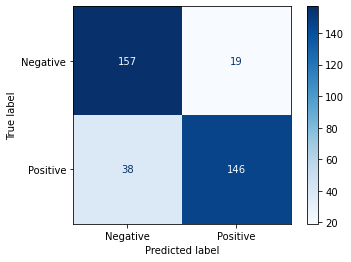

In [133]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = plot_confusion_matrix(rf_model, X_test, Y_test,
                                 cmap=plt.cm.Blues)
print(conf_matrix.confusion_matrix)
plt.show()

In [108]:
import pickle

file_name = "RandomForest.pkl"
pickle.dump(rf_model, open(file_name, 'wb'))

# Support Vector Machine

In [134]:
from sklearn.svm import SVC

svc = SVC()

param_grid = {'kernel': ['rbf', 'linear', 'poly'],
             'gamma': [0.1, 1, 10, 100],
             'C': [0.1, 1, 10, 100]}

svc_model = GridSearchCV(svc, param_grid, cv=3)
svc_model.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['rbf', 'linear', 'poly']})

In [135]:
svc_model.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [136]:
train_predictions =  svc_model.predict(X_train)
print(f"Train accuracy score is {accuracy_score(Y_train, train_predictions):.2f}")

Train accuracy score is 1.00


In [137]:
test_predictions =  svc_model.predict(X_test)
print(f"Train accuracy score is {accuracy_score(Y_test, test_predictions):.2f}")

Train accuracy score is 0.85


In [138]:
print(classification_report(Y_test, test_predictions))

              precision    recall  f1-score   support

    Negative       0.83      0.88      0.85       176
    Positive       0.87      0.83      0.85       184

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



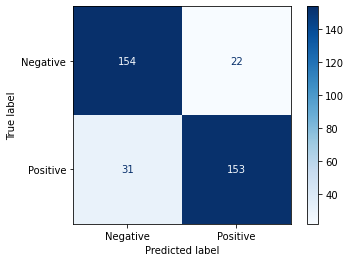

In [139]:
conf_matrix = plot_confusion_matrix(svc_model, X_test, Y_test, cmap=plt.cm.Blues)
plt.show()

In [140]:
file_name = "SVC.pkl"
pickle.dump(rf_model, open(file_name, 'wb'))

# Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

logistic_model = GridSearchCV(logistic_regression, param_grid, cv=5)
logistic_model.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [144]:
logistic_model.best_params_

{'C': 10}

In [142]:
train_predictions =  logistic_model.predict(X_train)
print(f"Train accuracy score is {accuracy_score(Y_train, train_predictions):.2f}")

Train accuracy score is 1.00


In [143]:
test_predictions =  logistic_model.predict(X_test)
print(f"Train accuracy score is {accuracy_score(Y_test, test_predictions):.2f}")

Train accuracy score is 0.84


In [145]:
print(classification_report(Y_test, test_predictions))

              precision    recall  f1-score   support

    Negative       0.81      0.89      0.85       176
    Positive       0.88      0.80      0.84       184

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



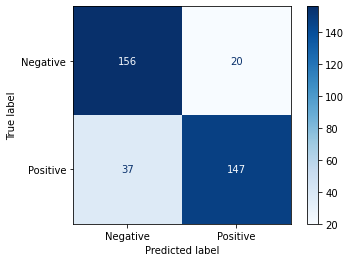

In [146]:
conf_matrix = plot_confusion_matrix(logistic_model, X_test, Y_test, cmap=plt.cm.Blues)
plt.show()

In [147]:
file_name = "LogsticRegression.pkl"
pickle.dump(rf_model, open(file_name, 'wb'))

# A full pipeline with both preparation and prediction

In [150]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextPreProcessing(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = [remove_diacritics(doc) for doc in X]
        X = [remove_punctuations(doc) for doc in X]
        X = [normalize_arabic(doc) for doc in X]
        X = [num_to_text(doc) for doc in X]
        return X

In [151]:
class NlpPipline(BaseEstimator, TransformerMixin):
    
    def __init__(self, lemmatization=True, tfidf=True):
        self.lemmatization = lemmatization
        self.tfidf = tfidf
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Tokenization
        word_tokens = [word_tokenize(doc) for doc in X]
        # Stop words removal
        stopword = stopwords.words("arabic")
        word_tokens = [w for w in word_tokens if w not in stopword]
        
        if( not self.lemmatization):
            # Stemming
            word_tokens = [stemming_words(w) for w in word_tokens]
        else:
            # Lemmatization
            word_tokens = [Lemmatization_words(w) for w in word_tokens]
        
        word_df = [' '.join([str(elem) for elem in doc]) for doc in word_tokens]
        
        return word_df

In [160]:
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ('pre-processing', TextPreProcessing()),
    ('nlp', NlpPipline()),
    ('TF-IDF',TfidfVectorizer()),
    ('SVC', SVC())
])


In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset["Feed"],dataset['Sentiment'], test_size=.2, random_state=100 )

In [162]:
full_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('pre-processing', TextPreProcessing()), ('nlp', NlpPipline()),
                ('TF-IDF', TfidfVectorizer()), ('LogisticRegression', SVC())])

In [163]:
test_predictions =  full_pipeline.predict(X_test)
print(f"Train accuracy score is {accuracy_score(Y_test, test_predictions):.2f}")

Train accuracy score is 0.85


In [164]:
print(classification_report(Y_test, test_predictions))

              precision    recall  f1-score   support

    Negative       0.83      0.86      0.85       176
    Positive       0.86      0.84      0.85       184

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



In [165]:
pickle.dump(full_pipeline, open('model.pkl', 'wb'))

In [167]:
model = pickle.load(open('model.pkl', 'rb'))
train_model_predictions = model.predict(X_train)

In [168]:
print(classification_report(Y_train, train_model_predictions))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       724
    Positive       1.00      1.00      1.00       716

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440



In [170]:
test_model_predictions = model.predict(X_test)
print(classification_report(Y_test, test_model_predictions))

              precision    recall  f1-score   support

    Negative       0.83      0.86      0.85       176
    Positive       0.86      0.84      0.85       184

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360

